In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
X,y = make_blobs(n_samples=200,n_features=2,cluster_std=2.3,centers=2,random_state=2)

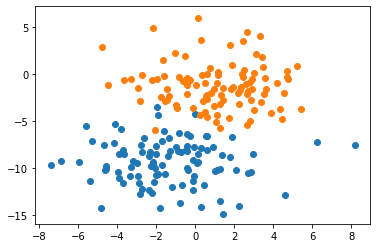

In [3]:
def plot_blobs(X,y):
    plt.clf()
    plt.scatter(X[y==0,0],X[y==0,1])
    plt.scatter(X[y==1,0],X[y==1,1])
    plt.show()

plot_blobs(X,y)

In [4]:
def sigmoid(x):
    return 1. / (1 + np.exp(-x))

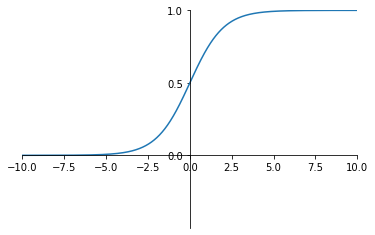

In [5]:
def plot_sigmoid():
    plt.clf()
    x = np.linspace(-10,10,1000)
    plt.plot(x,sigmoid(x))
    plt.xlim(-10,10)
    plt.ylim(-0.5,1)
    plt.yticks([0,0.5,1])
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))
    plt.show()

plot_sigmoid()

In [6]:
def y_hat(w,X):
    # w is vector
    #print(len(w.shape))
    assert len(w.shape) == 1 , "w must be vector"
    return X.dot(w.T)

In [7]:
#X_tttt = np.array([[1,1,1],[2,2,2],[3,3,3]]) 
#w_tttt = np.array([1,1,1])
#print(X_tttt.shape)
#print(w_tttt.shape)
#y_hat(w_tttt,X_tttt)

In [8]:
def probability(w,X):
    z  = y_hat(w,X)
    #print(z.shape)
    return sigmoid(z)

In [9]:
# 最大化对数似然
def log_mle(w,X,y):
    #print(np.log(hw(w,X)).shape)
    #print(np.log(1 - hw(w,X)).shape)
    logl = y * np.log(probability(w,X)) + (1 - y) * np.log(1 - probability(w,X))
    #print(logl.shape)
    return -np.sum(logl)

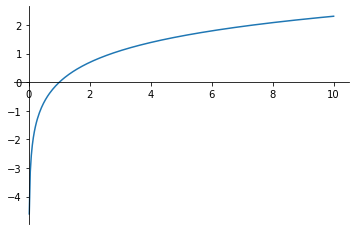

In [10]:
def plot_log():
    x = np.linspace(0.01,10,300)
    y = np.log(x)
    #print(y)
    plt.clf()
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))
    plt.plot(x,y)
    plt.show()
plot_log()

p :  0.24882352941176472 real p :  0.25


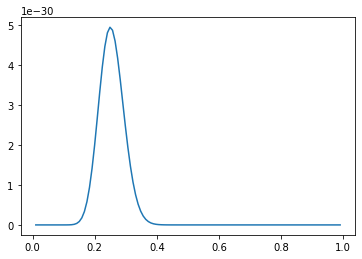

In [19]:
def plot_log_likelyhood(logmle):
    n = 120
    positive = 30
    negtive = 90
    y = np.ones(n)
    y[positive:] = 0
    p = np.linspace(0.01,0.99,n)# 1 will cause np.log(0) nan
    plt.clf()
    mle_res = []
    if logmle:
        for i_p in p:
            mle_res.append(np.sum(y * np.log(i_p) + (1 - y) * np.log(1 - i_p)))        
    else:
        for ip in p:
            mle_res.append(np.power(ip,np.sum(y==1)) * np.power(1-ip,np.sum(y==0)))

    print('p : ' ,p[np.argmax(mle_res)], 'real p : ', positive/n)
    plt.plot(p,mle_res)
    plt.show()

    
plot_log_likelyhood(False)

In [12]:
def gradient(w,X,y):
    # 这里之前写错了,返回的是一个梯度,即各个特征的偏导数.
    # X.shape = (m,n) m是样本数,n是特征数
    # X.T.shape
    return X.T.dot(probability(w,X) - y)

In [13]:
def grad_ascent(
    X
    , y
    , w = np.zeros(X.shape[1] + 1)
    , epsilon= 1e-6
    , max_iter = 1e6
    , alpha= 1e-4
):
    X_ = np.c_[X,np.ones(X.shape[0])]
    iters = 0
    while(iters < max_iter):
        grad = gradient(w,X_,y)
        old_w = w
        w = w - alpha * grad
        if(np.abs(np.abs(log_mle(w,X_,y))-np.abs(log_mle(old_w,X_,y))) < epsilon):
            break
        iters +=1
    print('final log_likelyhod : ', log_mle(w,X_,y))
    print('iter times : ', iters)
    return (w[:-1],w[-1])

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y)

lor = LogisticRegression(solver='sag',penalty='none',max_iter=1e6)
lor.fit(X_train,y_train)
wb = grad_ascent(X_train,y_train)

print(lor.coef_,lor.intercept_)
print(wb)

final log_likelyhod :  8.856312929636335
iter times :  183557
[[0.80424576 2.38598493]] [11.43047031]
(array([0.76483938, 2.27731231]), 10.932387214700109)


In [15]:
origin_wb = (lor.coef_,lor.intercept_)
my_wb = (wb[0].reshape(1,-1),np.array(wb[1]).reshape(-1))
print(my_wb[0].shape,my_wb[1].shape)
print(origin_wb[0].shape,origin_wb[1].shape)

(1, 2) (1,)
(1, 2) (1,)


In [16]:
print('origin : ', lor.score(X_test,y_test))
lor.coef = my_wb[0]
lor.intercept_ =my_wb[1]
print('my : ', lor.score(X_test,y_test))

origin :  0.98
my :  0.98


In [17]:
np.c_[origin_wb[0],origin_wb[1]]

array([[ 0.80424576,  2.38598493, 11.43047031]])

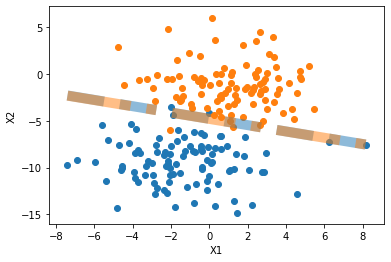

In [18]:
def plot_decision_boundary(X,y,w_s):
    X_plot = np.linspace(X[:,0].min(),X[:,0].max(),1000)
    linestyle = ['--','-.']
    for ls,w in zip(linestyle,w_s):
        y_plot = - (w[2] + w[0] * X_plot) / w[1] # X=0
        plt.plot(X_plot,y_plot,alpha=.5,linestyle=ls,linewidth=10)
    plt.scatter(X[y==0,0],X[y==0,1])
    plt.scatter(X[y==1,0],X[y==1,1])
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

#print(np.c_[origin_wb[0],origin_wb[1]])
w_all = [np.c_[origin_wb[0],origin_wb[1]].ravel(),np.c_[my_wb[0],my_wb[1]].ravel()] 
plot_decision_boundary(X,y,w_all)